# Visualización de datos 

In [3]:
#install.packages("tidyverse")
#install.packages("gganimate")
#install.packages("plotly")
#install.packages("gifski")
#install.packages("RColorBrewer")
#install.packages("wesanderson")
#install.packages("png") 
library(gifski)
library(tidyverse)
library(gganimate)
library(plotly)
library(RColorBrewer)
library(wesanderson)


In [9]:
# codigo limpieza y manipulación 
casos_diarios <-  read.csv(file = "Casos_Diarios_Estado_Nacional.csv")
casos_diario_list <- gather(casos_diarios,key ="dias",value="infectados",4:856)
#head(casos_diario_list)

normalizarfecha <- function(fecha){
return(str_replace_all(fecha,"X","")  %>% str_replace_all("\\.","/"))
}

cod_Meses <- function(x) {
labels_meses <- c(
    "Ene","Feb","Mar","Abr","May","Jun",
    "Jul","Ago","Sep","Oct","Nov","Dic")
    return(factor(x,levels = (1:12),labels = labels_meses))
    }

fecha = map(casos_diario_list[4],normalizarfecha)
casos_diarios_fecha <- cbind(casos_diario_list[c(TRUE,TRUE,TRUE,FALSE,TRUE)],fecha)
casos_diarios_fecha <- casos_diarios_fecha[c(1,2,3,5,4)]

datos <- separate( data = casos_diarios_fecha,
                   col =dias,
                   into = c("dia","mes","año"),
                   sep = '/',
                   remove = FALSE)

datos

cve_ent,poblacion,nombre,dias,dia,mes,año,infectados
<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,1434635,AGUASCALIENTES,26/02/2020,26,02,2020,0
2,3634868,BAJA CALIFORNIA,26/02/2020,26,02,2020,0
3,804708,BAJA CALIFORNIA SUR,26/02/2020,26,02,2020,0
4,1000617,CAMPECHE,26/02/2020,26,02,2020,0
7,5730367,CHIAPAS,26/02/2020,26,02,2020,0
8,3801487,CHIHUAHUA,26/02/2020,26,02,2020,0
9,9018645,DISTRITO FEDERAL,26/02/2020,26,02,2020,0
5,3218720,COAHUILA,26/02/2020,26,02,2020,0
6,785153,COLIMA,26/02/2020,26,02,2020,0


### Plot basico

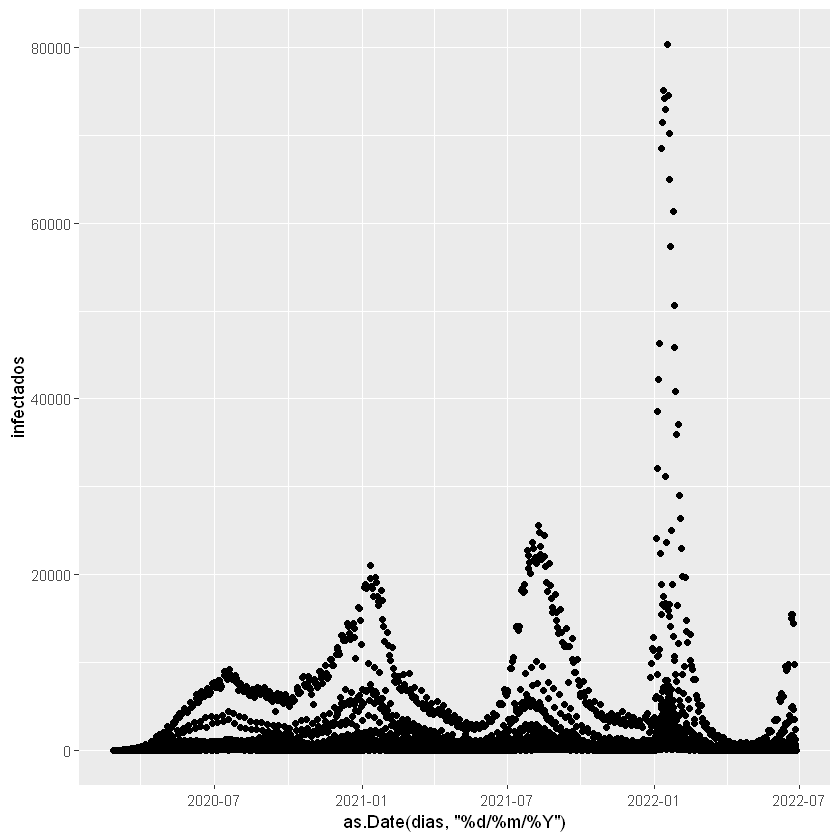

In [11]:
datos %>% ggplot(aes(x=as.Date(dias,"%d/%m/%Y"), y=infectados))+
    geom_point()

### Plot mejorado

In [30]:
library(gifski)
library(png)

In [37]:
library(gganimate)

options(jupyter.plot_mimetypes='image/png')

p1<-datos%>% filter(nombre=="Nacional")%>%
    filter(año%in% c("2020","2021")) %>%
    ggplot(aes(x=as.Date(dias,"%d/%m/%Y"), y=infectados))+
    geom_point()+geom_line()+
    #stat_smooth(method="gam",aes(x=as.Date(dias,"%d/%m/%Y"), y=infectados))+
    #coord_cartesian(xlim=c(as.Date("01/12/2020","%d /%m /%Y"),as.Date("01/02/2021","%d /%m /%Y")))
    transition_reveal(as.Date(dias,"%d/%m/%Y"))+
    view_follow()
p1
animate(p1,fps=7, width=1600,height=800,renderer=gifski_renderer())+
anim_save(filename="a.gif")


Rendering [>--------------------------------------------] at 14 fps ~ eta:  7s

Rendering [=>-------------------------------------------] at 14 fps ~ eta:  7s

Rendering [=>-------------------------------------------] at 13 fps ~ eta:  7s

Rendering [==>------------------------------------------] at 13 fps ~ eta:  7s

Rendering [===>-----------------------------------------] at 13 fps ~ eta:  7s

Rendering [====>----------------------------------------] at 13 fps ~ eta:  7s

Rendering [=====>---------------------------------------] at 13 fps ~ eta:  7s

Rendering [======>--------------------------------------] at 13 fps ~ eta:  7s

Rendering [=======>-------------------------------------] at 13 fps ~ eta:  6s

Rendering [========>------------------------------------] at 13 fps ~ eta:  6s

Rendering [=========>-----------------------------------] at 13 fps ~ eta:  6s

Rendering [==========>----------------------------------] at 13 fps ~ eta:  6s

Rendering [===========>----------------

ERROR: Error in animate(p1, fps = 7, width = 1600, height = 800, renderer = gifski_renderer()) + : argumento no-numérico para operador binario
